<a href="https://colab.research.google.com/github/Nanangk/Deep_Autoencoder_Implementation_with_Keras/blob/master/Deep_Autoencoder_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Autoencoder Implementation

This project aim to implementation of Deep Autoencoder with Keras, this project use fashion mnist dataset from keras

Fashion mnist is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. 

The class labels are:

Label	Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot 

<h3>What is Autoencoder?</h3>
Autoencoder is one of type neural network where the input is same as the output, autoencoder learn the input data and reconstruct the input data, autoencoder used for dimensionality reduction

![Autoencoder](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRj6teOvotqH0V03TJsL5avWnHWSUBFlJUJIgSjrdff2dz3ca5C&usqp=CAU)

In [1]:
#import library
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#Rescale  dataset
import numpy as np

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#reshape 2D (28x28) Image to 1D (784) 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
#Build Autoencoder Model

target_dimension = 16

#Encoder
input_img = Input(shape=(784,))
encoder = Dense(128, activation='relu')(input_img)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)

#code
coded = Dense(target_dimension, activation='relu')(encoder)

#Decoder
decoder = Dense(32, activation='relu')(coded)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(784, activation='sigmoid')(decoder)

autoencoder = Model(input_img, decoder)

In [5]:
#compile model
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

In [6]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [7]:
#Training model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.3613 - val_loss: 0.3166
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3092 - val_loss: 0.3066
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3021 - val_loss: 0.3019
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2982 - val_loss: 0.2987
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2955 - val_loss: 0.2968
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2933 - val_loss: 0.2945
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2916 - val_loss: 0.2930
Epoch 8/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2903 - val_loss: 0.2919
Epoch 9/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2894 - val_loss: 0.2919
Epoch

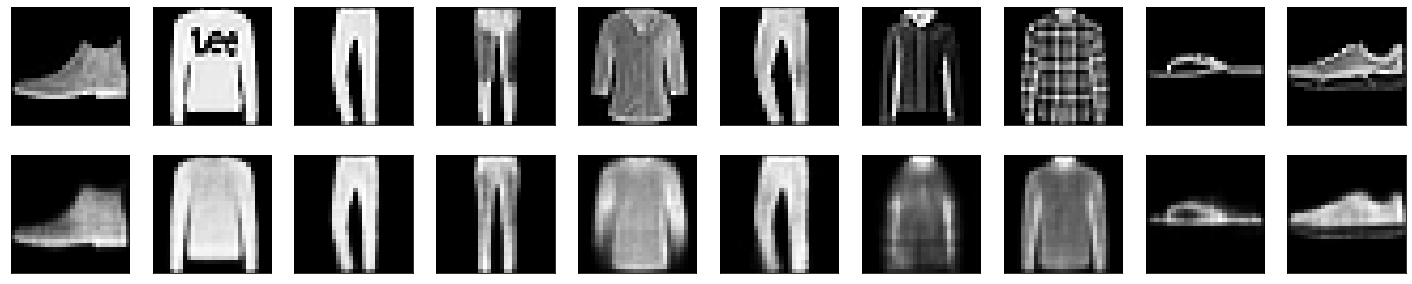

In [8]:
#Display original data and reconstruction data
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(25, 5))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#Build Classifier Model

In [9]:
#impoert library
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
#Build CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='linear', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [13]:
x_test[0].shape

(784,)

In [14]:
#reshape from 1D to 2D (28x28)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [15]:
#Train model without autoencoder image
model_without_autoencoder = model.fit(x_train, y_train, 
          batch_size=64, 
          epochs=10, 
          verbose=1,
          validation_data=(x_test, y_test)
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.4518 - accuracy: 0.8438 - val_loss: 0.4151 - val_accuracy: 0.8486
Epoch 2/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.3202 - accuracy: 0.8884 - val_loss: 0.3427 - val_accuracy: 0.8756
Epoch 3/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.2913 - accuracy: 0.8985 - val_loss: 0.3228 - val_accuracy: 0.8862
Epoch 4/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.2684 - accuracy: 0.9062 - val_loss: 0.3047 - val_accuracy: 0.8935
Epoch 5/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.2555 - accuracy: 0.9094 - val_loss: 0.3506 - val_accuracy: 0.8779
Epoch 6/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.2451 - accuracy: 0.9134 - val_loss: 0.2963 - val_accuracy: 0.8954
Epoch 7/10
60000/60000 [==============================] 

In [16]:
#reshape for predict 2D to 1D
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


decoded_train_imgs = autoencoder.predict(x_train)
decoded_test_imgs = autoencoder.predict(x_test)

In [17]:
#reshape for classification 1D to 2D
decoded_train_imgs = np.reshape(decoded_train_imgs, (len(decoded_train_imgs), 28, 28, 1)) 
decoded_test_imgs = np.reshape(decoded_test_imgs, (len(decoded_test_imgs), 28, 28, 1))

In [18]:
#Train model witht autoencoder image
model_with_autoencoder = model.fit(decoded_train_imgs, y_train, 
          batch_size=64, 
          epochs=10, 
          verbose=1,
          validation_data=(decoded_test_imgs, y_test)
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.4703 - accuracy: 0.8285 - val_loss: 0.4534 - val_accuracy: 0.8329
Epoch 2/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.4384 - accuracy: 0.8390 - val_loss: 0.4466 - val_accuracy: 0.8319
Epoch 3/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.4242 - accuracy: 0.8444 - val_loss: 0.4562 - val_accuracy: 0.8307
Epoch 4/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.4174 - accuracy: 0.8468 - val_loss: 0.4302 - val_accuracy: 0.8384
Epoch 5/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.4110 - accuracy: 0.8469 - val_loss: 0.4285 - val_accuracy: 0.8383
Epoch 6/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.4029 - accuracy: 0.8506 - val_loss: 0.4312 - val_accuracy: 0.8369
Epoch 7/10
60000/60000 [==============================] 

#Comparison Accuracy and Val Accuracy on original data and autoencoder data

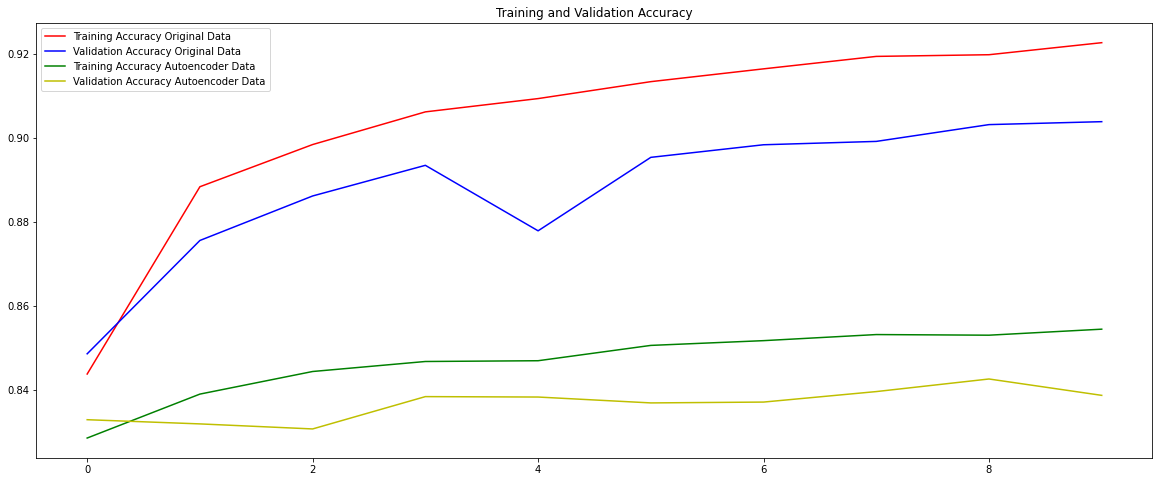

<Figure size 432x288 with 0 Axes>

In [19]:
#accuracy visualization

import matplotlib.pyplot as plt

acc = model_without_autoencoder.history['accuracy']
val_acc = model_without_autoencoder.history['val_accuracy']

acc2 = model_with_autoencoder.history['accuracy']
val_acc2 = model_with_autoencoder.history['val_accuracy']

epochs = range(len(acc))

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(epochs, acc, 'r', label='Training Accuracy Original Data')
ax.plot(epochs, val_acc, 'b', label='Validation Accuracy Original Data')
ax.plot(epochs, acc2, 'g', label='Training Accuracy Autoencoder Data')
ax.plot(epochs, val_acc2, 'y', label='Validation Accuracy Autoencoder Data')
ax.set_title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()